1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
import scipy as sc
import pandas as pd
import os.path
import seaborn as sns

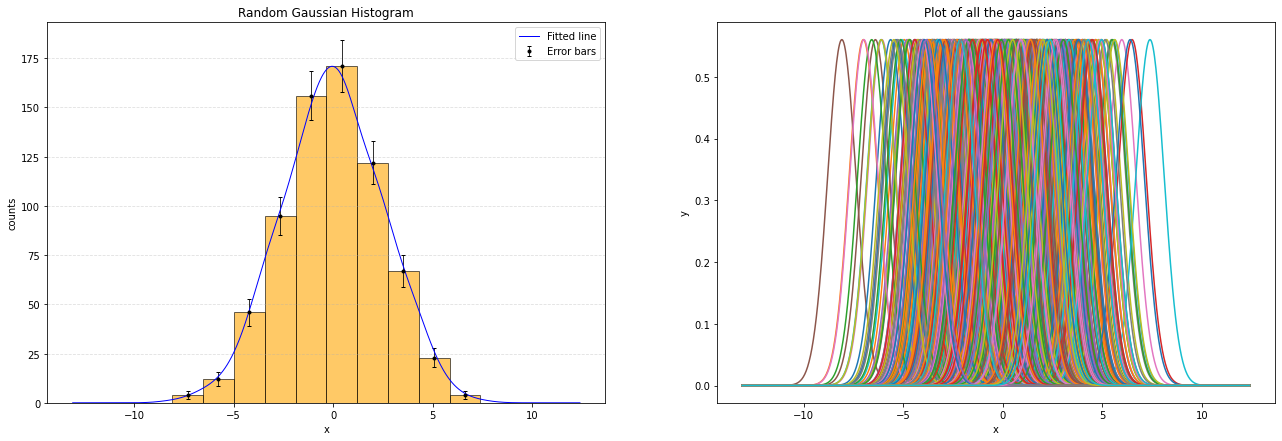

In [2]:
N = 700
mean = 0
stdv = 2.5

np.random.seed(123)

x = np.random.normal(mean, stdv, N)

fig, (pl1, pl2) = plt.subplots(nrows=1, ncols=2, figsize=(22, 7))

#plot the histogram
counts, bin_edges, _ = pl1.hist(x, bins = 10, histtype = "bar", ec = "black", 
                                 alpha = 0.6, color = "orange")
#get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
pl1.set_ylabel("counts")
pl1.set_xlabel("x")
pl1.set_title("Random Gaussian Histogram")
pl1.errorbar(bin_centers, counts, ecolor="black", elinewidth=0.8,fmt="k.",
             yerr=np.sqrt(counts), capsize = 2, label = "Error bars")
pl1.grid( axis = "y", alpha = 0.4, linestyle = "--")

#create a gaussian for each element of x
std_default = 1.06*x.std()*(x.size)**(-1/5)
x_axis = np.linspace(x.min()-2*stdv, x.max()+2*stdv, N) #create an x axis
gaussians = np.array([norm.pdf(x_axis, loc = x[i],
                               scale = std_default) for i in range(len(x))])
#plot all the gaussians
for i in range(len(x)):
    pl2.plot(x_axis, gaussians[i])

pl2.set_ylabel("y")
pl2.set_xlabel("x")
pl2.set_title("Plot of all the gaussians")

#sum all the gaussians
sum_gaussians = np.sum(gaussians, axis = 0)

#normalize the result
Z = sc.integrate.trapz(sum_gaussians, x_axis)

#get the area of the hist
width = bin_edges[1] - bin_edges[0]
area = width * N

#plot histogram and the gaussian
pl1.plot(x_axis, sum_gaussians*area/Z, color ="blue", linewidth = 1, 
         label = "Fitted line" )
pl1.legend()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 15:40:43--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 15:40:43--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf16eb16b483eb7e74ced894a17.dl.dropboxusercontent.com/cd/0/inline/BDUBxXmU3nczHEMpCUPPw266kZWZA_kusMaJGnU6FZQmpg2DeplD3bU3vlcGQNbzfEN-XhYY8fhAgchucXiEAmQ9Z2xOw1aDPDmynEwt8EZTkQ/file# [segue]
--2020-11-17 15:40:43--  https://ucf16eb16b483eb7e74ced894a17.dl.dropboxusercontent.com/cd/0/inline/BDUBxXmU3nczHEMpCUPPw266kZWZA_kusMaJGnU6FZQmpg2DeplD3bU3vlcGQNbzfEN-XhYY8fhAg

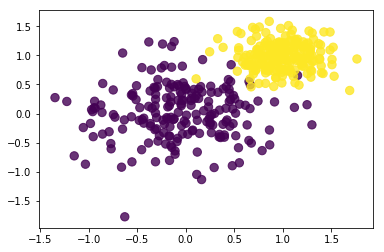

In [69]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


Category 1
Mean:0
Std:1

Category 2
Mean:5
Std:1.5


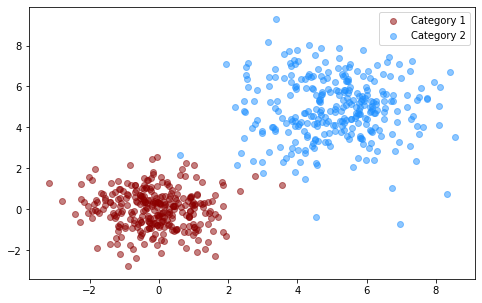

In [3]:
def dataset(n_cat):
    n_points = 300
    d = {} #empty dictionary
    for j in range(1,n_cat+1):
        print("\nCategory", j)
        mean = float(input("Mean:"))
        std = float(input("Std:"))
        d["cat{0}_x".format(j)] = np.random.normal(mean, std, n_points)
        d["cat{0}_y".format(j)] = np.random.normal(mean, std, n_points)
    return d, list(d.keys())

data, keys = dataset(2)

fig = plt.figure(figsize = (8,5))
plt.scatter(x = data["cat1_x"], y = data["cat1_y"], 
            alpha = 0.5, c = "darkred", label = "Category 1")
plt.scatter(x = data["cat2_x"], y = data["cat2_y"], 
            alpha = 0.5, c = "dodgerblue", label = "Category 2")
plt.legend()
plt.show()



Category 1
Insert mean:0
Insert std:2

Category 2
Insert mean:5
Insert std:0.5

Category 3
Insert mean:10
Insert std:3

Category 4
Insert mean:20
Insert std:1.6


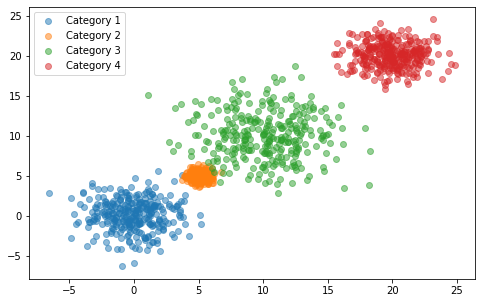

In [23]:
data1, keys1 = dataset(4)
x_keys1 = keys1[::2]
y_keys1 = keys1[1::2]

fig = plt.figure(figsize = (8,5))
for i in range(len(x_keys1)):
    plt.scatter(x = data1[x_keys1[i]], y = data1[y_keys1[i]],
                alpha = 0.5, label = "Category {0}".format(i+1))
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [2]:
sns.set_style("ticks")

if not os.path.isfile("residuals_261.npy"):
      !wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

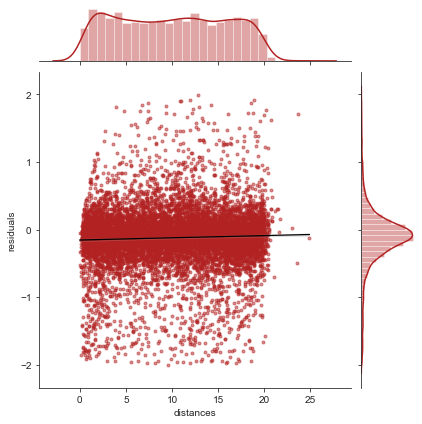

In [31]:
df = pd.DataFrame(np.load("residuals_261.npy", allow_pickle = True).item())

#clean the sample
df_clean = df[np.abs(df["residuals"])<2]

#perform a linear regression
slope, intercept, rvalue, pvalue , stderr = sc.stats.linregress(
    df_clean["distances"],df_clean["residuals"])

#plot a seaborn jointplot of "residuals" versus "distances"
j_plot = sns.jointplot(x="distances", y="residuals",
              data=df_clean, kind="reg", color = "firebrick", marker = ".", 
                       joint_kws={"line_kws":{"color":"black", "linewidth":1.2},
                                 "scatter_kws":{"alpha": 0.5}})
plt.show()

#fill 3 numpy arrays
n_bins = 13

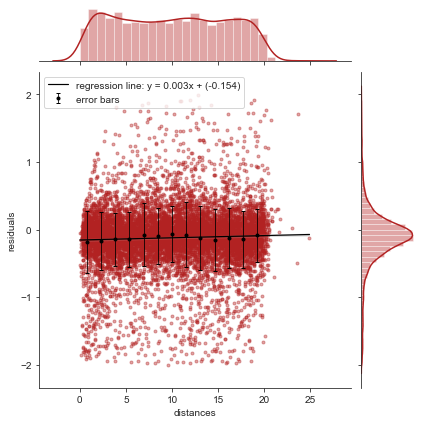

In [49]:
ran = np.linspace(0, 20, n_bins+1)
x = (ran[1:] + ran[:-1])/2
residuals = list(df_clean["residuals"])
y_list = []
erry_list = []

for i, j in zip(ran[:-1], ran[1:]):
    dist_slice = df_clean[(df_clean["distances"] > i)
                      & (df_clean["distances"] < j)]["residuals"].values
    y_list.append(dist_slice.mean())
    erry_list.append(dist_slice.std())
    
#convert lists to arrays
y = np.array(y_list)
erry = np.array(erry_list)
    
j_plot_1 = sns.jointplot(x="distances", y="residuals",
              data=df_clean, kind="reg", color = "firebrick", marker = ".",
                        joint_kws={"line_kws":{"color":"black","linewidth":1.2, 
                                               "label" : "regression line: y = {}x + ({})".format(round(slope,3), round(intercept,3))}, 
                                   "scatter_kws":{"alpha": 0.4}})
plt.errorbar(x,y,yerr=erry, label="error bars", color="k",
             ecolor="black", elinewidth=0.8, fmt="k.", capsize = 2)
plt.legend(loc = 2)
plt.show()
